(427, 640, 3)


([], [])

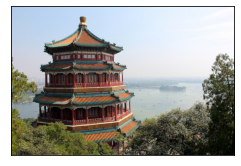

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

one_image=load_sample_image("china.jpg") # 샘플 이미지 로딩
print(one_image.shape) # 이미지의 차원
# 전체 이미지
plt.figure(figsize=(4,4))
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

(161048, 100, 150, 3)


([], [])

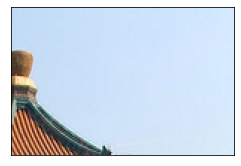

In [4]:
# 부분 이미지
patches=image.extract_patches_2d(one_image, (100,150))
print(patches.shape)

plt.figure(figsize=(4,4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [6]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces=datasets.fetch_olivetti_faces()

rng=np.random.RandomState()
kmeans=MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size=(20,20) # 이미지의 20×20 픽셀 부분

buffer=[]
t0=time.time()
# 400장의 이미지를 6회 반복 = 2400
index=0
for _ in range(6): # 6회 반복
    for img in faces.images: # 400장의 이미지
        data=extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data=np.reshape(data,(len(data), -1))
        buffer.append(data)
        index+=1
        if index%10 == 0:
            data=np.concatenate(buffer, axis=0)
            data-=np.mean(data, axis=0)
            data/=np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer=[]
        if index%100 == 0:
            print('부분 학습 : %4i / %i' % (index, 6*len(faces.images)))

dt=time.time()-t0
print('실행 시간 :', dt)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


부분 학습 :  100 / 2400
[MiniBatchKMeans] Reassigning 11 cluster centers.
부분 학습 :  200 / 2400
부분 학습 :  300 / 2400
부분 학습 :  400 / 2400
부분 학습 :  500 / 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
부분 학습 :  600 / 2400
부분 학습 :  700 / 2400
부분 학습 :  800 / 2400
부분 학습 :  900 / 2400
부분 학습 : 1000 / 2400
부분 학습 : 1100 / 2400
부분 학습 : 1200 / 2400
부분 학습 : 1300 / 2400
부분 학습 : 1400 / 2400
부분 학습 : 1500 / 2400
부분 학습 : 1600 / 2400
부분 학습 : 1700 / 2400
부분 학습 : 1800 / 2400
부분 학습 : 1900 / 2400
부분 학습 : 2000 / 2400
부분 학습 : 2100 / 2400
부분 학습 : 2200 / 2400
부분 학습 : 2300 / 2400
부분 학습 : 2400 / 2400
실행 시간 : 3.5092837810516357


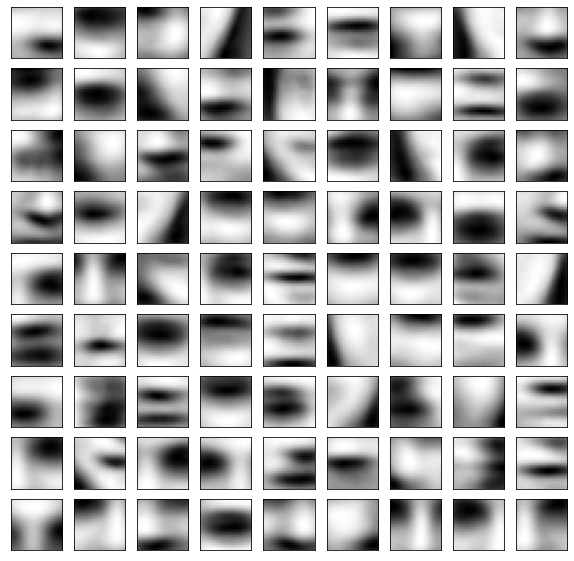

In [7]:
plt.figure(figsize=(10,10))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i+1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()